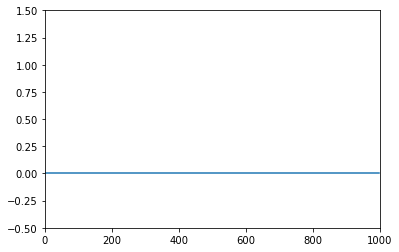

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.close_figures = False

def create_bandits(n, mean=0, std=1, b_std=1):
    bandits = []

    for i in range(n):
        bandits.append([np.random.normal(mean, std), b_std])

    return bandits


def bandit_random_walk(bandits, shift):
    for bandit in bandits:
        bandit[0] += shift if np.random.uniform() < 0.5 else -shift
    return bandits


def main_func():
    num_bandits = 10
    episodes = 1000
    alpha = 0.1
    epsilon = 0.1
    shift = 0.01

    merge_choices_num = 1
    reruns = 1000

    merged_choices = []

    for h in range(reruns):
        correct_choices = []

        bandits = create_bandits(num_bandits)
        max_bandit = 0
        best_bandit = 0
        for i in range(len(bandits)):
            if bandits[i][0] > max_bandit:
                max_bandit = bandits[i][0]
                best_bandit = i

        q = np.zeros(num_bandits)
        n = np.zeros(num_bandits)

        for i in range(episodes):
            bandit_random_walk(bandits, shift)    # Random walk by shift amount

            selected_bandit = np.argmax(q)

            if np.random.uniform() < epsilon:
                selected_bandit = np.random.choice(len(q))

            reward = np.random.normal(bandits[selected_bandit][0], bandits[selected_bandit][1])

            n[selected_bandit] += 1

            # q[selected_bandit] += (reward - q[selected_bandit]) / n[selected_bandit]    # Sample Average
            # alpha = 1/(i + 1)  # Variable alpha
            q[selected_bandit] += alpha * (reward - q[selected_bandit])   # Using alpha

            correct_choices.append(int(selected_bandit == best_bandit))

            if i <= merge_choices_num:
                merged_choice = sum(correct_choices)/len(correct_choices)
            else:
                merged_choice = sum(correct_choices[-merge_choices_num:])/merge_choices_num

            if h == 0:
                merged_choices.append(merged_choice)
            else:
                merged_choices[i] += (merged_choice - merged_choices[i]) / (h + 1)

    plt.axis([0, episodes, -0.5, 1.5])
    plt.plot(range(episodes), merged_choices)
    plt.show()
            
main_func()  

In [7]:
[np.random.normal(0, 1), 1]

[-0.5955212118560875, 1]